# MLP Face Recognition using PCA + ANN
Dataset: https://github.com/robaita/introduction_to_machine_learning/blob/main/dataset.zip

In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import os
import cv2

In [2]:
# Step 2: Load dataset and create face database
dir_name = 'dataset/faces/'  # adjust path to your dataset
images = []
labels = []
label_names = os.listdir(dir_name)

for idx, person_name in enumerate(label_names):
    person_dir = os.path.join(dir_name, person_name)
    if not os.path.isdir(person_dir):
        continue
    for img_name in os.listdir(person_dir):
        img_path = os.path.join(person_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (100, 100))
        images.append(img_resized.flatten())
        labels.append(idx)

images = np.array(images)
labels = np.array(labels)
print(f"Dataset loaded: {images.shape[0]} samples.")

Dataset loaded: 450 samples.


In [3]:
# Step 3: Split and mean zero
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)
mean_face = np.mean(X_train, axis=0)
X_train_zero = X_train - mean_face
X_test_zero = X_test - mean_face

In [4]:
# Step 4: PCA
n_components = 50
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized', random_state=42)
X_train_pca = pca.fit_transform(X_train_zero)
X_test_pca = pca.transform(X_test_zero)
print(f"PCA completed: reduced to {n_components} components.")

PCA completed: reduced to 50 components.


In [5]:
# Step 5: ANN
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1, verbose=True)
clf.fit(X_train_pca, y_train)
accuracy = np.mean(clf.predict(X_test_pca) == y_test) * 100
print(f"Recognition Accuracy: {accuracy:.2f}%")

Iteration 1, loss = 2.42950917
Iteration 2, loss = 2.34848368
Iteration 3, loss = 2.27967522
Iteration 4, loss = 2.21420981
Iteration 5, loss = 2.15225535
Iteration 6, loss = 2.09314325
Iteration 7, loss = 2.03697622
Iteration 8, loss = 1.98245393
Iteration 9, loss = 1.92884855
Iteration 10, loss = 1.87714986
Iteration 11, loss = 1.82713480
Iteration 12, loss = 1.77877981
Iteration 13, loss = 1.73167710
Iteration 14, loss = 1.68524663
Iteration 15, loss = 1.64122298
Iteration 16, loss = 1.59776382
Iteration 17, loss = 1.55409845
Iteration 18, loss = 1.51278473
Iteration 19, loss = 1.47250179
Iteration 20, loss = 1.43296953
Iteration 21, loss = 1.39461723
Iteration 22, loss = 1.35731379
Iteration 23, loss = 1.32075009
Iteration 24, loss = 1.28505207
Iteration 25, loss = 1.25143399
Iteration 26, loss = 1.21795783
Iteration 27, loss = 1.18518833
Iteration 28, loss = 1.15358221
Iteration 29, loss = 1.12312326
Iteration 30, loss = 1.09335080
Iteration 31, loss = 1.06438991
Iteration 32, los

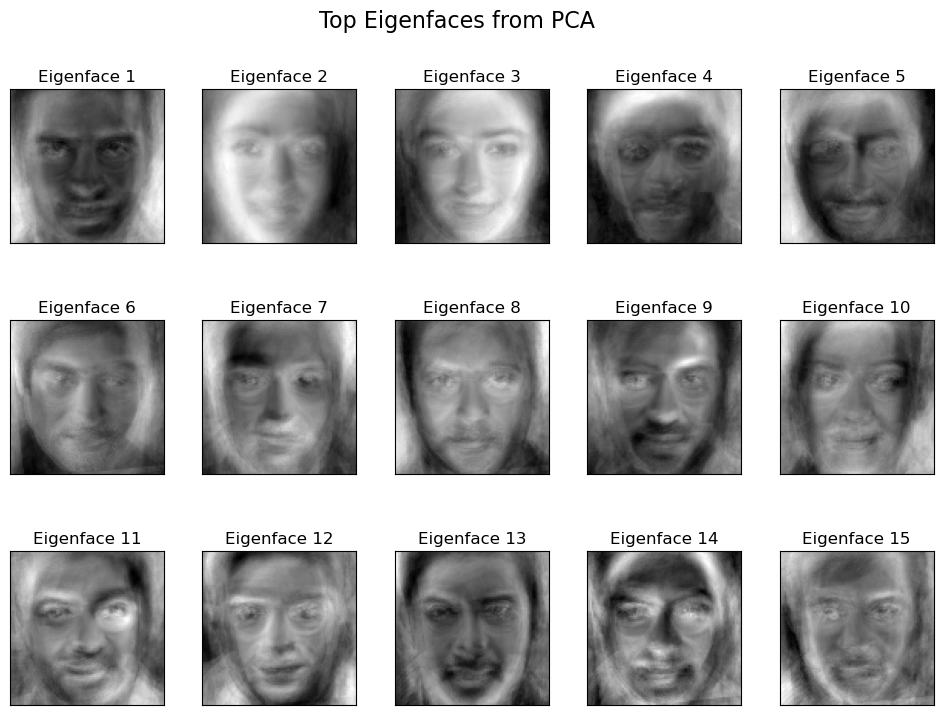

In [6]:
# Step 6: Plot top eigenfaces
eigenfaces = pca.components_.reshape((n_components, 100, 100))
fig, axes = plt.subplots(3, 5, figsize=(12, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5))
for i, ax in enumerate(axes.flat):
    if i < n_components:
        ax.imshow(eigenfaces[i], cmap='gray')
        ax.set_title(f"Eigenface {i+1}")
plt.suptitle('Top Eigenfaces from PCA', fontsize=16)
plt.show()

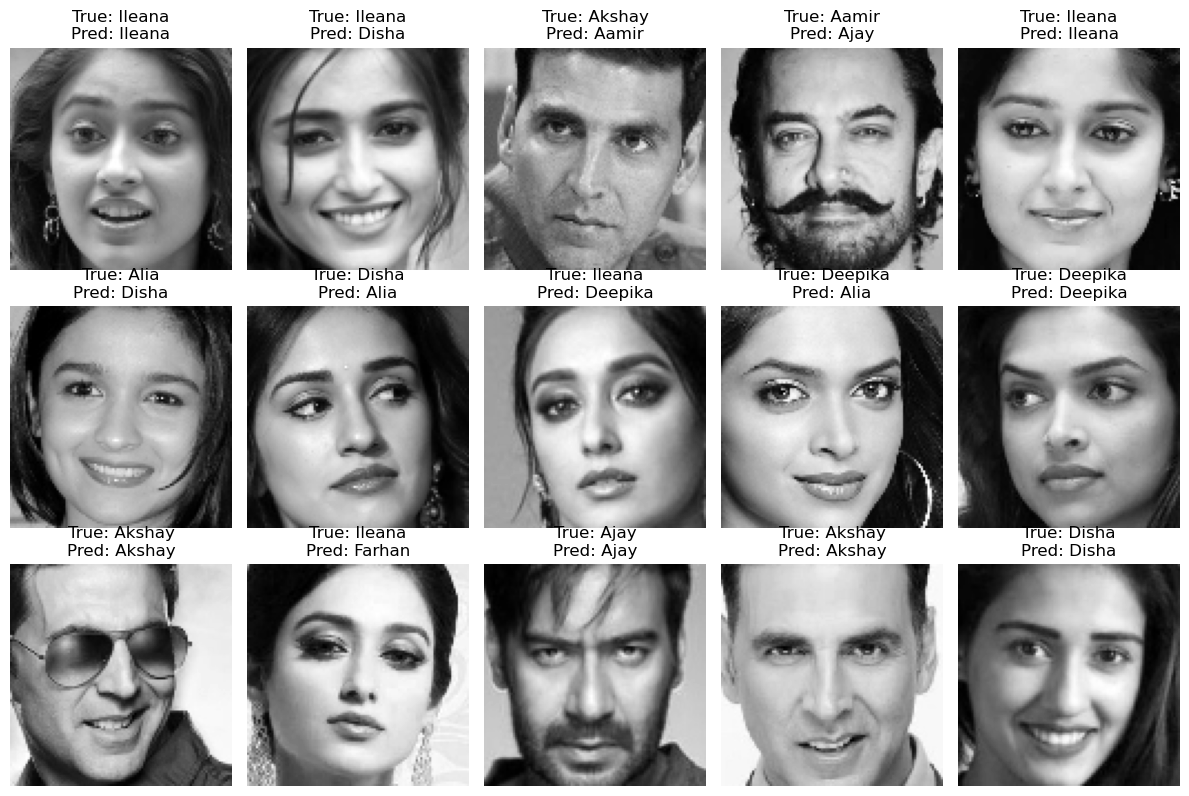

In [7]:
# Step 7: Visualize some test images with predictions
def plot_predictions(images_flat, y_true, y_pred, label_names, h=100, w=100):
    fig, axes = plt.subplots(3, 5, figsize=(12, 8))
    for ax, image, true, pred in zip(axes.flat, images_flat, y_true, y_pred):
        img = image.reshape((h, w))
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {label_names[true]}\nPred: {label_names[pred]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

y_pred = clf.predict(X_test_pca)
plot_predictions(X_test[:15], y_test[:15], y_pred[:15], label_names)